# HSB and RGB Spaces

### 1. Importing Libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import plotly.io as pio
from sklearn.cluster import KMeans

pio.renderers.default = "browser"

### 2. Loading and Showing Image

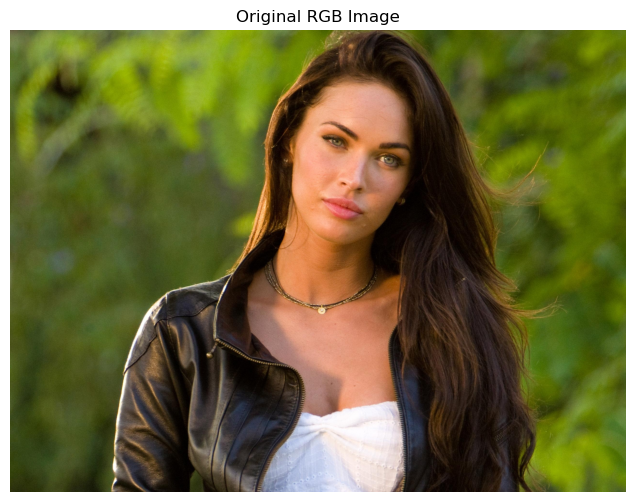

In [2]:
img_bgr = cv2.imread("image.jpg")  
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8,6))
plt.imshow(img_rgb)
plt.title("Original RGB Image")
plt.axis("off")
plt.show()

### 3. Converting to HSV

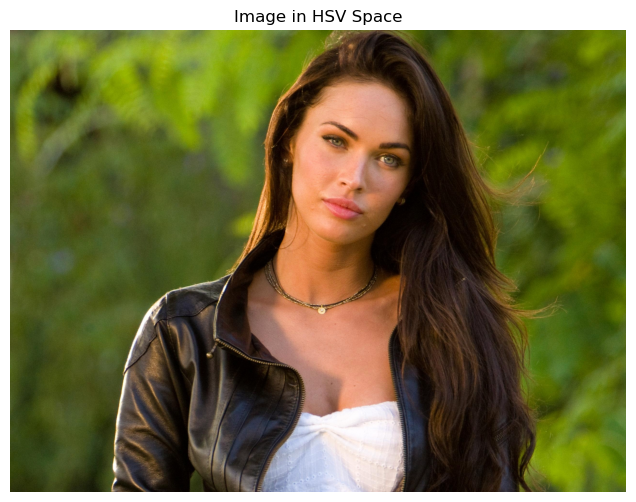

In [3]:
img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)

plt.figure(figsize=(8,6))
plt.imshow(cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB))
plt.title("Image in HSV Space")
plt.axis("off")
plt.show()

### 4. Isolating R, G, B Channels

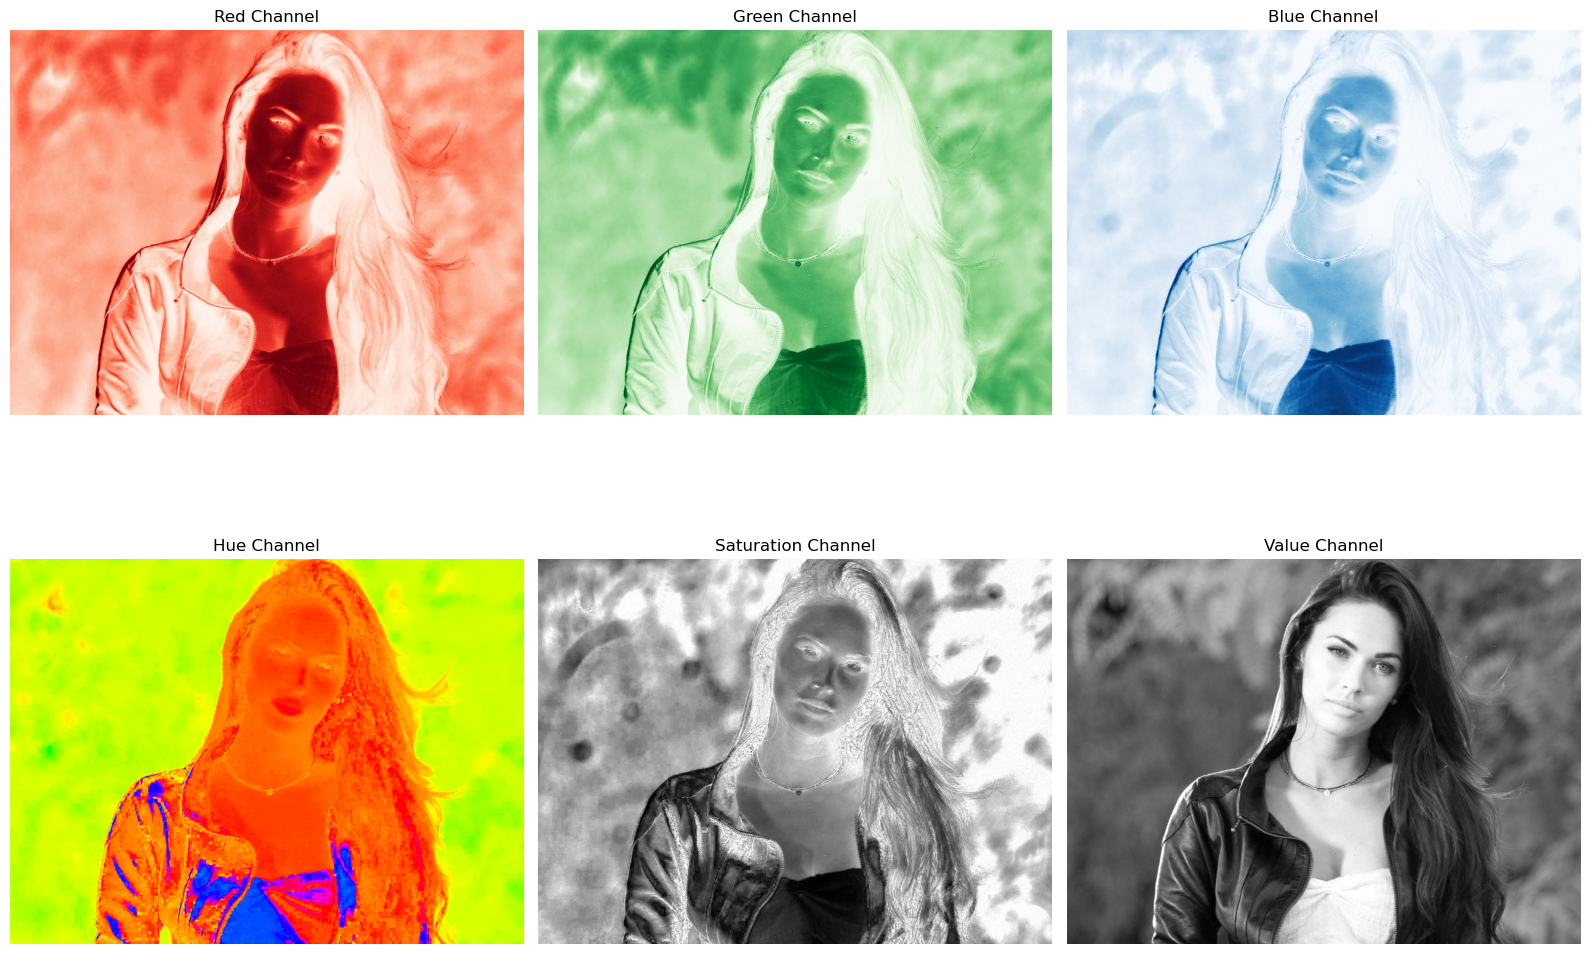

In [4]:
R, G, B = img_rgb[:,:,0], img_rgb[:,:,1], img_rgb[:,:,2]

H, S, V = img_hsv[:,:,0], img_hsv[:,:,1], img_hsv[:,:,2]

fig, axs = plt.subplots(2, 3, figsize=(16,12))

axs[0,0].imshow(R, cmap="Reds"); axs[0,0].set_title("Red Channel"); axs[0,0].axis("off")
axs[0,1].imshow(G, cmap="Greens"); axs[0,1].set_title("Green Channel"); axs[0,1].axis("off")
axs[0,2].imshow(B, cmap="Blues"); axs[0,2].set_title("Blue Channel"); axs[0,2].axis("off")

axs[1,0].imshow(H, cmap="hsv"); axs[1,0].set_title("Hue Channel"); axs[1,0].axis("off")
axs[1,1].imshow(S, cmap="gray"); axs[1,1].set_title("Saturation Channel"); axs[1,1].axis("off")
axs[1,2].imshow(V, cmap="gray"); axs[1,2].set_title("Value Channel"); axs[1,2].axis("off")

plt.tight_layout()
plt.show()

### 5. Scatterplots in RGB & HSV

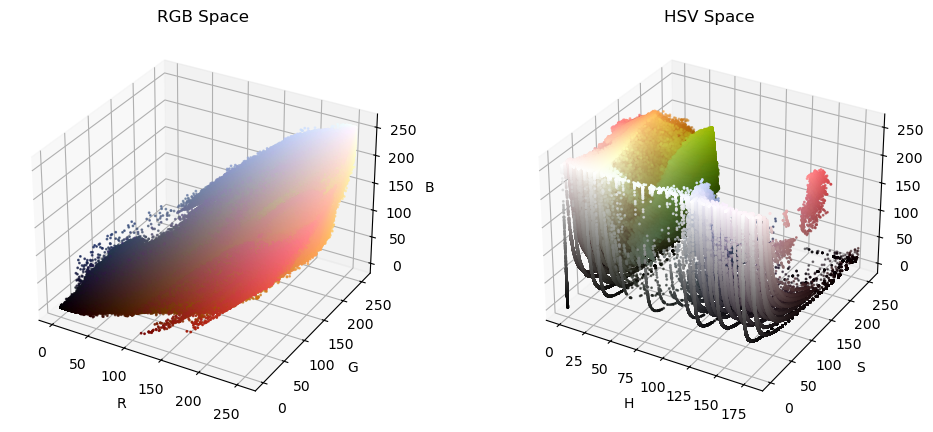

In [5]:
pixels_rgb = img_rgb.reshape(-1, 3)
pixels_hsv = img_hsv.reshape(-1, 3)

sample_idx = np.random.choice(len(pixels_rgb), size=1500, replace=False)
pixels_rgb_sample = pixels_rgb[sample_idx]
pixels_hsv_sample = pixels_hsv[sample_idx]

fig = plt.figure(figsize=(12,5))

ax1 = fig.add_subplot(121, projection="3d")
ax1.scatter(pixels_rgb[:,0], pixels_rgb[:,1], pixels_rgb[:,2], s=1, c=pixels_rgb/255.0)
ax1.set_title("RGB Space")
ax1.set_xlabel("R"); ax1.set_ylabel("G"); ax1.set_zlabel("B")

ax2 = fig.add_subplot(122, projection="3d")
ax2.scatter(pixels_hsv[:,0], pixels_hsv[:,1], pixels_hsv[:,2], s=1, c=img_rgb.reshape(-1,3)/255.0)
ax2.set_title("HSV Space")
ax2.set_xlabel("H"); ax2.set_ylabel("S"); ax2.set_zlabel("V")

plt.show()

rgb_colors = [f'rgb({r},{g},{b})' for r, g, b in pixels_rgb_sample]

fig_rgb = px.scatter_3d(
    x=pixels_rgb_sample[:,0],
    y=pixels_rgb_sample[:,1],
    z=pixels_rgb_sample[:,2],
    color=rgb_colors,  
    title="Interactive RGB Scatter",
    opacity=0.5
)

hsv_colors = [f'rgb({r},{g},{b})' for r, g, b in pixels_rgb_sample]  

fig_hsv = px.scatter_3d(
    x=pixels_hsv_sample[:,0],
    y=pixels_hsv_sample[:,1],
    z=pixels_hsv_sample[:,2],
    color=hsv_colors,
    title="Interactive HSV Scatter",
    opacity=0.5
)

fig_rgb.show()
fig_hsv.show()

### 6. Custom Brightness Function

In [6]:
def adjust_brightness(img_rgb, factor=1.0):
    hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV).astype(np.float32)
    hsv[:,:,2] = np.clip(hsv[:,:,2] * factor, 0, 255)  # Adjust V channel
    hsv = hsv.astype(np.uint8)
    return cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)

### 7. Brightness Adjustments

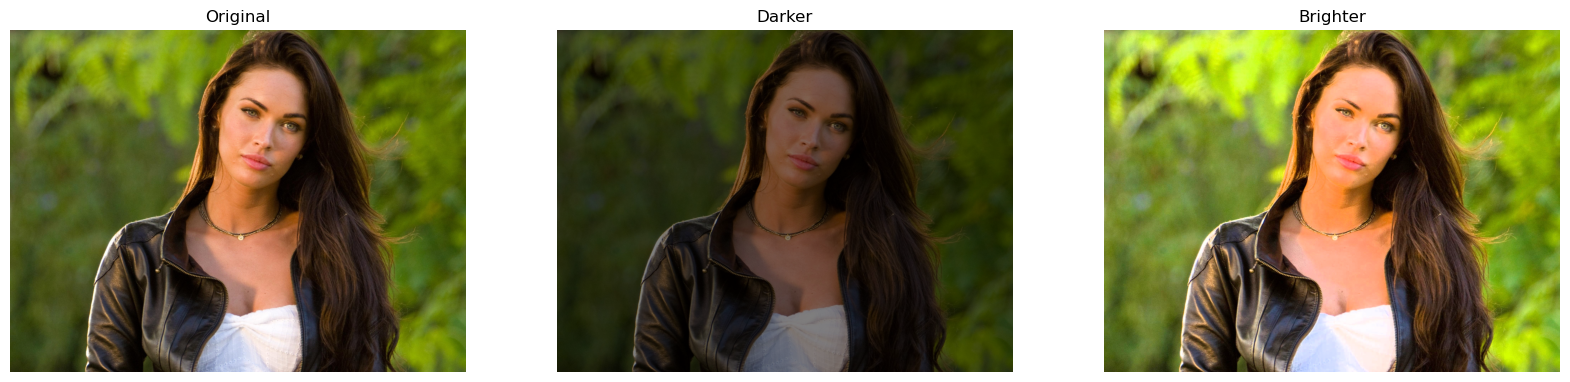

In [7]:
img_dark = adjust_brightness(img_rgb, 0.5)
img_bright = adjust_brightness(img_rgb, 1.5)

fig, axs = plt.subplots(1,3, figsize=(20,15))
axs[0].imshow(img_rgb); axs[0].set_title("Original"); axs[0].axis("off")
axs[1].imshow(img_dark); axs[1].set_title("Darker"); axs[1].axis("off")
axs[2].imshow(img_bright); axs[2].set_title("Brighter"); axs[2].axis("off")
plt.show()

### 8. Histograms

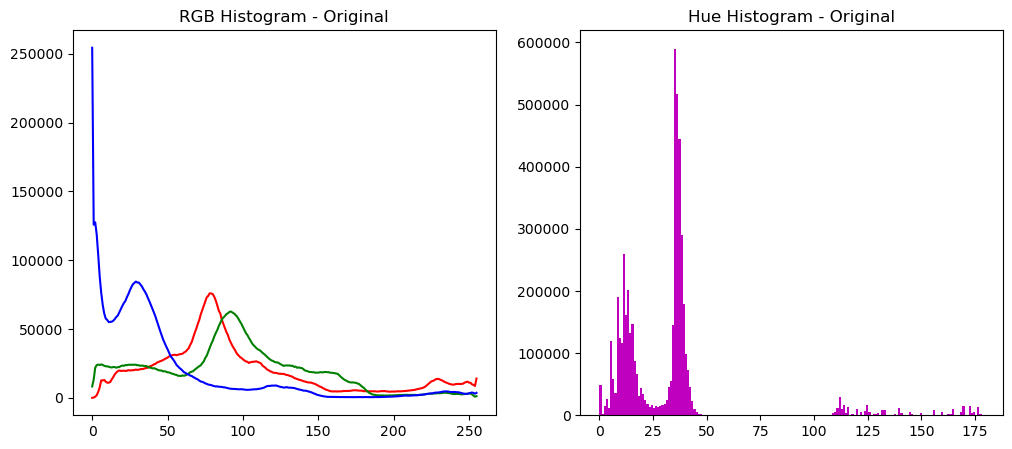

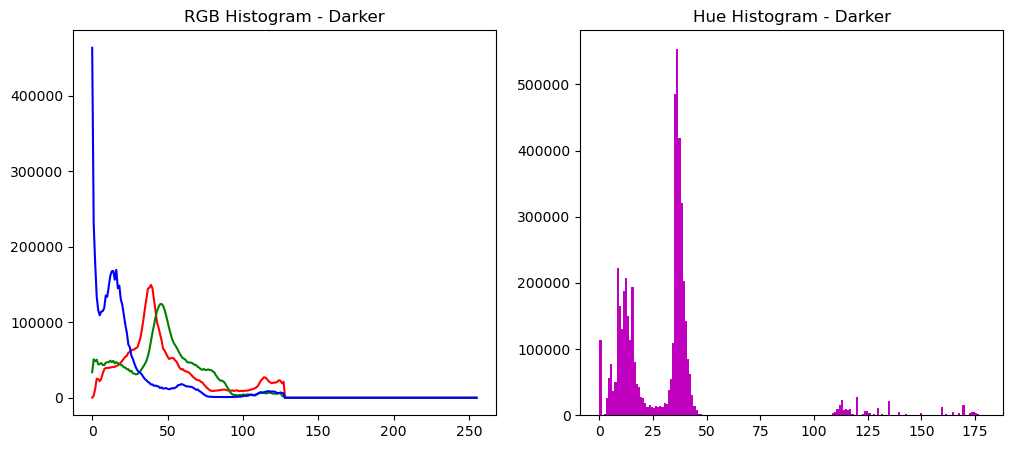

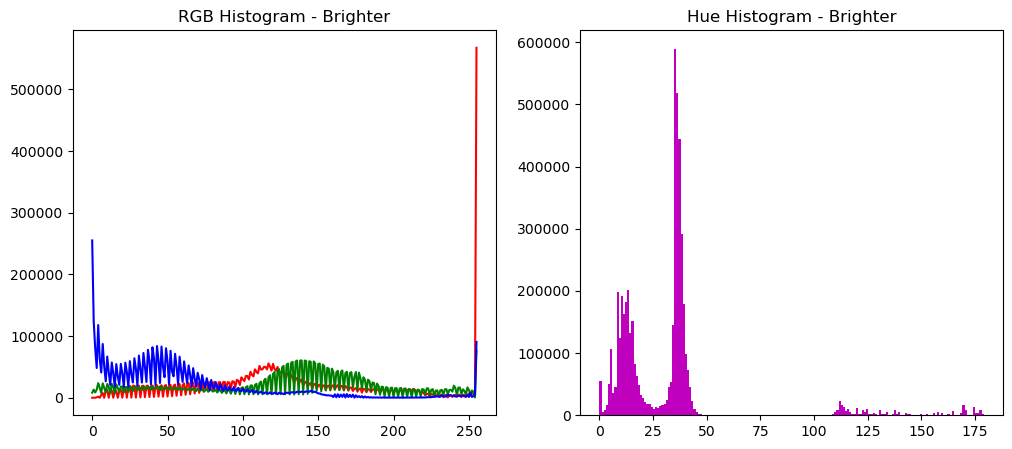

In [8]:
def plot_histograms(img_rgb, title):
    img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)
    colors = ("r","g","b")
    
    plt.figure(figsize=(12,5))
    
    # RGB histogram
    plt.subplot(1,2,1)
    for i,col in enumerate(colors):
        hist = cv2.calcHist([img_rgb],[i],None,[256],[0,256])
        plt.plot(hist, color=col)
    plt.title(f"RGB Histogram - {title}")
    
    # Hue histogram
    plt.subplot(1,2,2)
    plt.hist(img_hsv[:,:,0].ravel(), bins=180, color="m")
    plt.title(f"Hue Histogram - {title}")
    plt.show()

plot_histograms(img_rgb, "Original")
plot_histograms(img_dark, "Darker")
plot_histograms(img_bright, "Brighter")


### 9. KMeans Clustering Compactness

In [9]:
def compute_inertia(img, space="RGB"):
    if space=="HSV":
        img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    pixels = img.reshape(-1,3)
    kmeans = KMeans(n_clusters=1, random_state=42).fit(pixels)
    return kmeans.inertia_

inertia_rgb = compute_inertia(img_bright, "RGB")
inertia_hsv = compute_inertia(img_bright, "HSV")

print("Inertia in RGB Space:", inertia_rgb)
print("Inertia in HSV Space:", inertia_hsv)

Inertia in RGB Space: 56606701922.10079
Inertia in HSV Space: 46730367455.34357


### 10. Limitations of Using HSV Histogram Compactness to Predict Classifier Performance

Although our KMeans clustering results indicated that HSV histograms often exhibit greater compactness than RGB histograms, this observation does not necessarily imply that classifiers trained on HSV representations will consistently achieve better performance. Several limitations should be considered:

#### 10.1 Compactness Does Not Imply Discriminability
Inertia measures the within-cluster compactness of data points, indicating how closely pixels cluster together. However, effective classification depends primarily on between-class separation. Therefore, a lower inertia in HSV space does not guarantee that samples from different classes are more easily distinguishable.

#### 10.2 Hue Instability at Low Saturation
When the saturation component is near zero, the hue value becomes unreliable or undefined, producing noisy histograms. This instability can reduce classifier performance, despite the apparent compactness suggested by inertia.

#### 10.3 Task-Specific Feature Relevance
Feature importance is application-dependent. For example:
- Medical imaging or grayscale images often rely on intensity information, making RGB or grayscale features more informative.  
- HSV emphasizes color, which may not capture other critical structural or textural features necessary for some tasks.

#### 10.4 Non-Uniform Perceptual Spacing
The HSV color space is not perceptually uniform: equal numerical differences in HSV values do not correspond to equal perceptual differences. Therefore, compactness in HSV space may be misleading regarding actual similarity of samples.

---

**Conclusion:**  
Although HSV histograms may show lower inertia in clustering experiments, this metric alone cannot be generalized to predict superior classifier performance. Reliable evaluation requires supervised classification experiments using standard metrics such as accuracy, precision, recall, and F1-score.


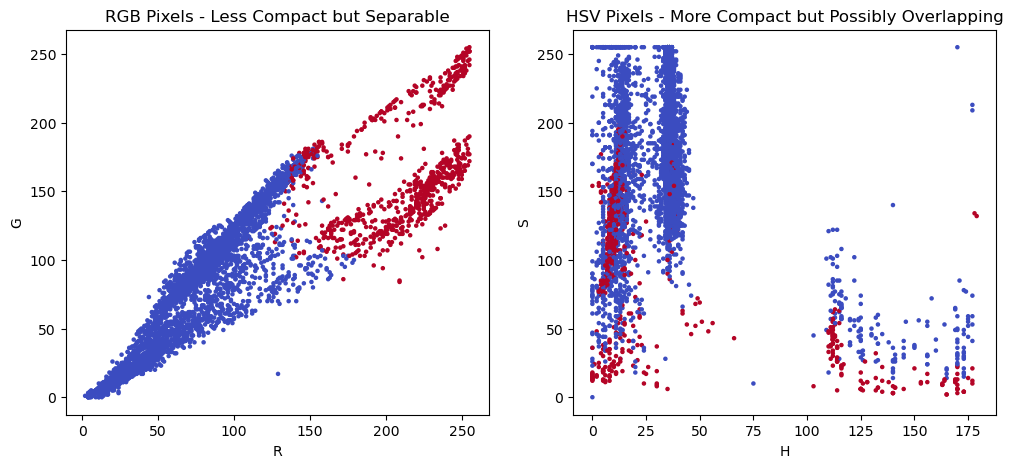

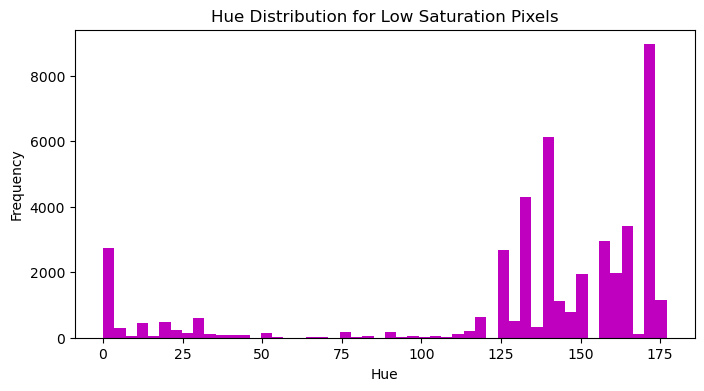

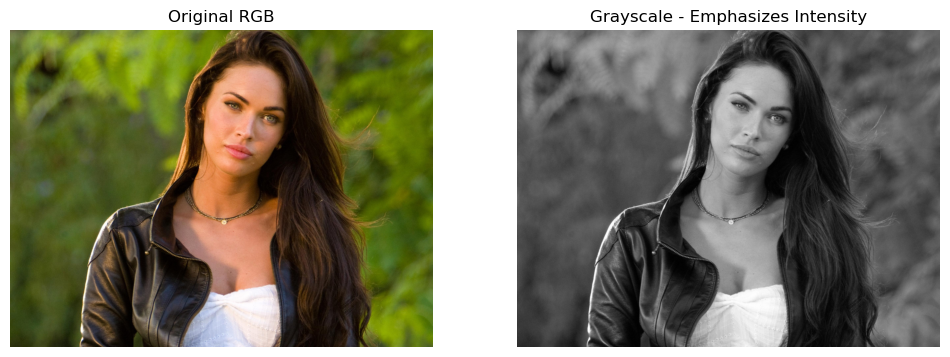

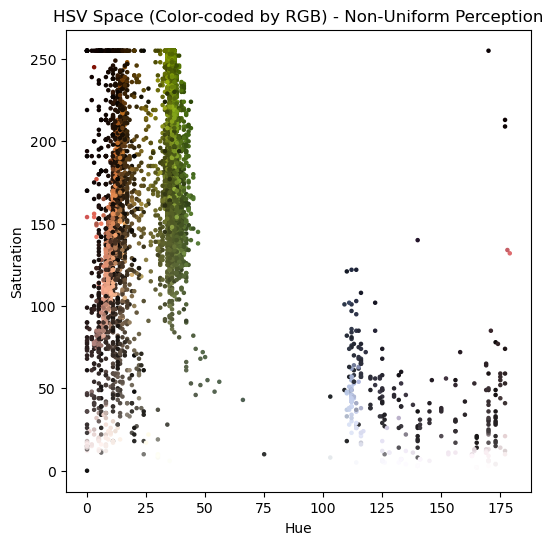

In [10]:
# 10. Demonstrating Limitations of Using HSV Histogram Compactness for Classifier Performance
from sklearn.cluster import KMeans

pixels_rgb = img_rgb.reshape(-1, 3)
pixels_hsv = img_hsv.reshape(-1, 3)

kmeans_rgb = KMeans(n_clusters=2, random_state=42).fit(pixels_rgb)
kmeans_hsv = KMeans(n_clusters=2, random_state=42).fit(pixels_hsv)

labels_rgb = kmeans_rgb.labels_
labels_hsv = kmeans_hsv.labels_

sample_idx = np.random.choice(len(pixels_rgb), size=5000, replace=False)

# 10.1 Compactness ≠ Discriminability
fig, axs = plt.subplots(1,2, figsize=(12,5))

axs[0].scatter(pixels_rgb[sample_idx,0], pixels_rgb[sample_idx,1],
               c=labels_rgb[sample_idx], cmap='coolwarm', s=5)
axs[0].set_title("RGB Pixels - Less Compact but Separable")
axs[0].set_xlabel("R"); axs[0].set_ylabel("G")

axs[1].scatter(pixels_hsv[sample_idx,0], pixels_hsv[sample_idx,1],
               c=labels_hsv[sample_idx], cmap='coolwarm', s=5)
axs[1].set_title("HSV Pixels - More Compact but Possibly Overlapping")
axs[1].set_xlabel("H"); axs[1].set_ylabel("S")

plt.show()


# 10.2 Hue Instability at Low Saturation
low_sat_pixels = img_hsv[img_hsv[:,:,1] < 10]  

plt.figure(figsize=(8,4))
plt.hist(low_sat_pixels[:,0], bins=50, color='m')
plt.title("Hue Distribution for Low Saturation Pixels")
plt.xlabel("Hue"); plt.ylabel("Frequency")
plt.show()


# 10.3 Task-Specific Feature Relevance
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

fig, axs = plt.subplots(1,2, figsize=(12,6))
axs[0].imshow(img_rgb)
axs[0].set_title("Original RGB")
axs[0].axis('off')
axs[1].imshow(img_gray, cmap='gray')
axs[1].set_title("Grayscale - Emphasizes Intensity")
axs[1].axis('off')
plt.show()


# 10.4 Non-Uniform Perceptual Spacing
plt.figure(figsize=(6,6))
plt.scatter(pixels_hsv[sample_idx,0], pixels_hsv[sample_idx,1],
            c=pixels_rgb[sample_idx]/255.0, s=5)
plt.xlabel("Hue"); plt.ylabel("Saturation")
plt.title("HSV Space (Color-coded by RGB) - Non-Uniform Perception")
plt.show()
